In [1]:
import json
import pandas as pd

NAME_FILE = '../name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)

In [2]:
NUMERIC_MEMORY_CSV = '../data/numeric_memory.csv'

data = pd.read_csv(NUMERIC_MEMORY_CSV)

In [3]:
renamed_nm = data.rename(columns=name_data)
renamed_nm

,subject_id,Maximum digits remembered correctly
0,1000085,9.0
1,1000158,7.0
2,1000251,8.0
3,1000279,8.0
4,1000295,7.0
...,...,...
111041,6024683,7.0
111042,6024769,4.0
111043,6024781,8.0
111044,6024822,8.0


In [4]:
# renamed_nm.to_csv('../processed_data/numeric_memory.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

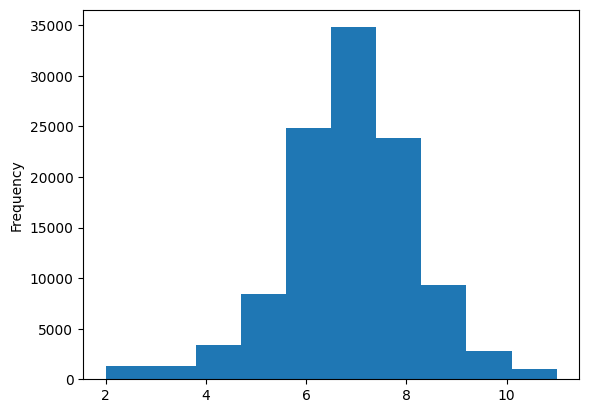

In [5]:
renamed_nm['Maximum digits remembered correctly'].plot.hist()